In [1]:
# import pandas as pd
# from os import path
# from PIL import Image
# from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import os
import re
import math

import nltk
# from nltk.tokenize.toktok import ToktokTokenizer

%matplotlib inline

In [2]:
corpus_path = "./french/lo.txt"

data = ""

with open(corpus_path, encoding="utf8") as fo:
	data = fo.read()

In [3]:
data = nltk.word_tokenize(data)

data = [word.lower() for word in data if re.match(r"\b[a-z]*\b", word)]

In [4]:
vocab = {}

for word in data:
	if word in vocab:
		vocab[word] += 1
	else:
		vocab[word] = 1

counts = [tuple(reversed(x)) for x in vocab.items()]
counts = sorted(counts, reverse=True)

In [5]:
word_count = len(data)
probs = [(count[0], count[0]/word_count , count[1]) for count in counts]
probs

[(7044, 0.061112412482756825, 'et'),
 (4052, 0.03515438605623661, 'de'),
 (3072, 0.026652091304234665, 'la'),
 (2784, 0.024153457744462665, 'les'),
 (2596, 0.02252240528183372, 'le'),
 (1592, 0.013811891066517442, 'il'),
 (1570, 0.01362102322514597, 'à'),
 (1424, 0.01235435482331711, 'dans'),
 (1368, 0.011868509408916999, 'que'),
 (1353, 0.01173837224434554, 'je'),
 (1288, 0.011174444531202555, 'des'),
 (1039, 0.009014167599316347, 'qui'),
 (892, 0.007738823386516055, 'ne'),
 (825, 0.007157544051430207, 'un'),
 (792, 0.006871242289372999, 'lui'),
 (721, 0.0062552597104014295, 'mais'),
 (721, 0.0062552597104014295, 'en'),
 (712, 0.006177177411658555, 'tu'),
 (696, 0.006038364436115666, 'sur'),
 (656, 0.005691331997258443, 'nous'),
 (621, 0.0053876786132583745, 'ainsi'),
 (596, 0.00517078333897261, 'du'),
 (577, 0.00500594293051543, 'une'),
 (552, 0.004789047656229666, 'odysseus'),
 (548, 0.0047543444123439435, 'ses'),
 (545, 0.004728316979429653, 'son'),
 (543, 0.004710965357486791, 'il

In [6]:
ranks = [idx+1 for idx, prob in enumerate(probs)]
probs_data = [prob[1] for prob in probs]
probs_data

[0.061112412482756825,
 0.03515438605623661,
 0.026652091304234665,
 0.024153457744462665,
 0.02252240528183372,
 0.013811891066517442,
 0.01362102322514597,
 0.01235435482331711,
 0.011868509408916999,
 0.01173837224434554,
 0.011174444531202555,
 0.009014167599316347,
 0.007738823386516055,
 0.007157544051430207,
 0.006871242289372999,
 0.0062552597104014295,
 0.0062552597104014295,
 0.006177177411658555,
 0.006038364436115666,
 0.005691331997258443,
 0.0053876786132583745,
 0.00517078333897261,
 0.00500594293051543,
 0.004789047656229666,
 0.0047543444123439435,
 0.004728316979429653,
 0.004710965357486791,
 0.004710965357486791,
 0.004684937924572499,
 0.004485394272229597,
 0.00438128454057243,
 0.0041990925101723885,
 0.00406895534560093,
 0.0040255762907437775,
 0.0038607358822865968,
 0.0037132470957722775,
 0.0035570824982865275,
 0.003531055065372236,
 0.0034703243885722216,
 0.003426945333715069,
 0.003383566278857916,
 0.003374890467886486,
 0.0033141597910864716,
 0.003123

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
consider_first = 100

# inverse law
inverse_x = np.linspace(1, consider_first, consider_first * 10)  # Values of x
inverse_y = probs[0][1] / inverse_x  # Inverse relationship, y = 1/x

In [9]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sma

In [11]:
x = np.array(ranks).reshape((-1,1))
y = np.array(probs_data)
x = sma.add_constant(x)
model = sma.OLS(y, x).fit()


In [20]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     244.5
Date:                Sat, 21 Oct 2023   Prob (F-statistic):           1.86e-54
Time:                        19:01:32   Log-Likelihood:                 54933.
No. Observations:                9888   AIC:                        -1.099e+05
Df Residuals:                    9886   BIC:                        -1.098e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004   1.88e-05     18.916      0.0

In [21]:
print(model.summary2().tables[1])

              Coef.      Std.Err.          t         P>|t|        [0.025  \
const  3.559601e-04  1.881843e-05  18.915508  2.041990e-78  3.190721e-04   
x1    -5.153755e-08  3.296116e-09 -15.635840  1.858275e-54 -5.799861e-08   

             0.975]  
const  3.928480e-04  
x1    -4.507649e-08  


In [14]:
lr_x = x
lr_y = model.predict(lr_x)

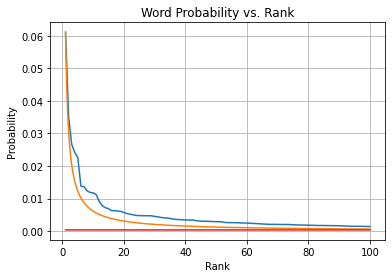

In [16]:


plt.figure()

# rank vs probability
plt.plot(ranks[0:consider_first], probs_data[0:consider_first])
# use this to view full graph instead
# plt.plot(ranks, probs_data, marker='o', linestyle='-')

# inverse law
plt.plot(inverse_x, inverse_y)

# linear regression model
plt.plot(lr_x[0:consider_first], lr_y[0:consider_first])

plt.xlabel('Rank')
plt.ylabel('Probability')
plt.title('Word Probability vs. Rank')
plt.grid(True)
plt.show()